In [2]:
import tensorflow as tf
import keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
# Inicializando a Rede Neural Convolucional

classifier = Sequential()

# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Passo 3 - Flattening
classifier.add(Flatten())

# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Treinando a Rede Neural Convolucional
Pré-Processamento


In [4]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('dataset_personagens/test_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_personagens/test_set',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 73 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


Treinamento

In [5]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit(training_set,
                         steps_per_epoch = 3,
                         epochs = 200,
                         validation_data = validation_set,
                         validation_steps = 3)

Epoch 1/200


3/3 [==============================] - 1s 140ms/step - loss: 0.8166 - accuracy: 0.5753 - val_loss: 0.8346 - val_accuracy: 0.4247
Epoch 2/200
3/3 [==============================] - 0s 92ms/step - loss: 0.7476 - accuracy: 0.4247 - val_loss: 0.6928 - val_accuracy: 0.4247
Epoch 3/200
3/3 [==============================] - 0s 63ms/step - loss: 0.6694 - accuracy: 0.5753 - val_loss: 0.6498 - val_accuracy: 0.5753
Epoch 4/200
3/3 [==============================] - 0s 65ms/step - loss: 0.6488 - accuracy: 0.6027 - val_loss: 0.6496 - val_accuracy: 0.5753
Epoch 5/200
3/3 [==============================] - 0s 82ms/step - loss: 0.6520 - accuracy: 0.5753 - val_loss: 0.6276 - val_accuracy: 0.5753
Epoch 6/200
3/3 [==============================] - 0s 64ms/step - loss: 0.6246 - accuracy: 0.6027 - val_loss: 0.5924 - val_accuracy: 0.6301
Epoch 7/200
3/3 [==============================] - 0s 80ms/step - loss: 0.6008 - accuracy: 0.7397 - val_loss: 0.5385 - val_accuracy: 0.7945
Epoch 8/200
3/3 [

Fazendo Previsões


1/1 [==============================] - 0s 15ms/step


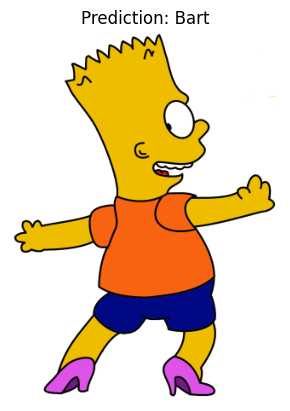

In [10]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img(
    'dataset_personagens/training_set/bart/bart102.bmp', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

img = mpimg.imread('dataset_personagens/training_set/bart/bart102.bmp')
plt.imshow(img)
plt.axis('off')  # Desativa os eixos
plt.title(f"Prediction: {prediction}")
plt.show()

# dummy = Image(filename='dataset_personagens/training_set/bart/bart55.bmp')

1/1 [==============================] - 0s 16ms/step


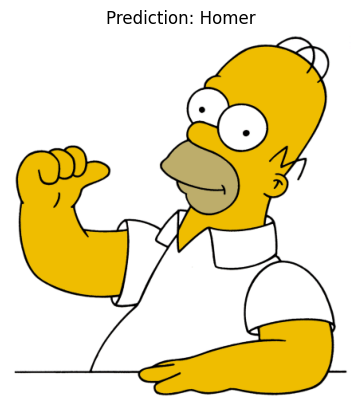

In [11]:
# Segunda Imagem
test_image = image.load_img('dataset_personagens/training_set/homer/homer102.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

img = mpimg.imread('dataset_personagens/training_set/homer/homer102.bmp')
plt.imshow(img)
plt.axis('off')  # Desativa os eixos
plt.title(f"Prediction: {prediction}")
plt.show()
#Image(filename='dataset_personagens/training_set/bart/bart55.bmp')